# DUN - Scenariusz Ruelle'a-Takensa-Newhouse'a. Wykład 7

Drogi do chaosu, które do tej pory poznaliśmy:
* Intermitencja
    1. 1 (tangencjalna)
    2. 3 (to nie jest błąd numerowania) (odwrotna 2x okres)
* Podwajanie okresu (logmapa)

I to było często (acz czy tylko? nie!) dla odwzorowań dyskretnych. Pozostały nam jeszcze...

## POTOKI/PRZEPŁYWY DYSYPATYWNE!

Potoki, znaczy pola wektorowe w przestrzeni fazowej. 

**Dysypacja** - czyli obszar w przestrzeni fazowej ZMNIEJSZA OBJĘTOŚĆ.

Prosty przykład: rzut kulą w polu g=9.81 itd, uwzględniamy tarcie i opór powietrza. Niezależnie jak tą kulą rzucimy, wyląduje na ziemi, z zerową prędkością. Więc wszystkie punkty odpowiadające początkowej prędkości i położeniu (można to widzieć jako taką 2d siatkę) kolapsują się do linii na prędkości zero, położeniu dowolnym (na ziemi).

### Oscylator van der Pola - dysypatywny
Przeklejam kod z poprzedniego...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def vdp(r, t, beta, omega):
    x, y = r
    return np.array([y, beta*(1-x*x)*y - omega**2*x])

def plot_vdp(beta, omega=1):
    t = np.linspace(0, 100, 10000)
    plt.xlabel('$x$')
    plt.ylabel('$\dot{x}$')
    plt.title(r'Oscylator van der Pola, $\beta =$ {}'.format(beta))
    max_init = 5
    plt.grid()
    for i in range(50):
        r = odeint(vdp, max_init*np.random.random(2)-max_init/2, t, args=(beta, omega)).T
        x, y = r
        plt.plot(x, y, alpha=0.7)

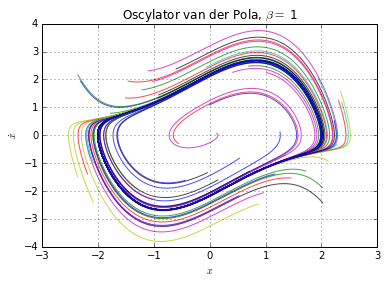

In [2]:
plot_vdp(1)

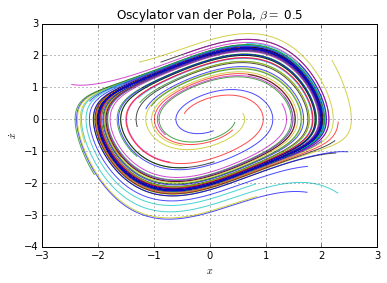

In [3]:
plot_vdp(0.5)

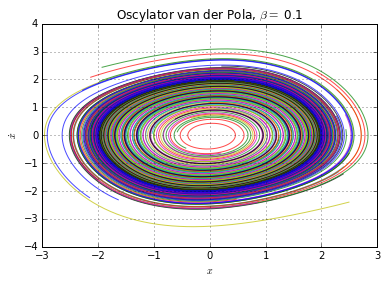

In [4]:
plot_vdp(0.1)

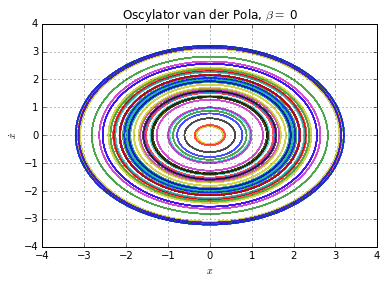

In [5]:
plot_vdp(0) #oscylator harmoniczny :)

W miarę jak przechodzimy od $\beta$ 0 do 0.1 (zmieniamy ją na dodatnią) zmieniamy znak Re w wartościach własnych jakobianu (patrz Strogatz, rozdział 5).

### Ruch po torusie
Ruch dwóch sprzężonych oscylatorów można modelować jako ruch po torusie.

In [74]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
def torus(w1=2, w2=50, A1=5, A2=2):
    t = np.linspace(0, 200, 10000)

    theta1 = w1*t
    theta2 = w2*t
    x1, y1 = A1 * np.cos(theta1), A1 * np.sin(theta1)
    x2, y2 = A2 * np.cos(theta2), A2 * np.sin(theta2)
    
    r1 = np.vstack([x1, y1, np.zeros_like(y1)]) #położenie środka drugiego okręgu
    r2 = np.vstack([x2, x2, y2])
    rotation = np.vstack([np.cos(theta1), np.sin(theta1), np.ones_like(theta1)])
    r = rotation*r2 + r1
    rmin = r.min()
    rmax = r.max()
    x, y, z = r
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim(rmin, rmax)
    ax.set_ylim(rmin, rmax)
    ax.set_zlim(rmin, rmax)
    ax.plot(x, y, z)
    ax.plot(*r1)

<IPython.core.display.Javascript object>


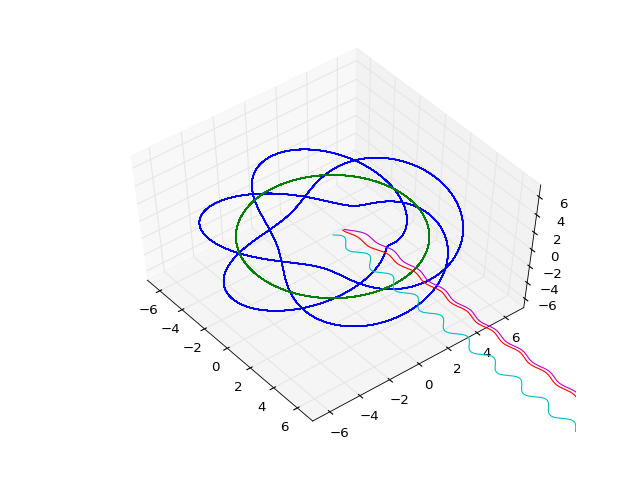

In [138]:
torus(w1 = 3, w2 = 5)

<IPython.core.display.Javascript object>


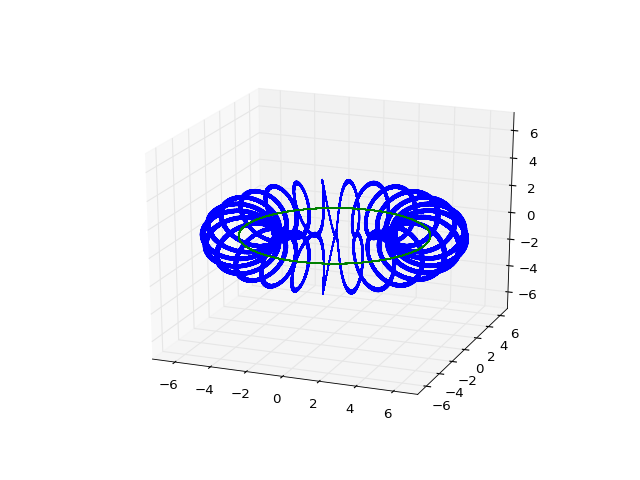

In [75]:
torus(w1=2, w2=50, A1=5, A2=2)

<IPython.core.display.Javascript object>


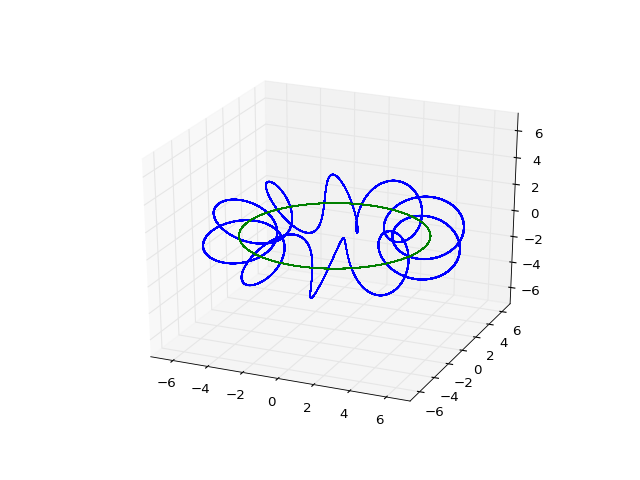

In [76]:
torus(w1=2, w2=20, A1=5, A2=2)

<IPython.core.display.Javascript object>


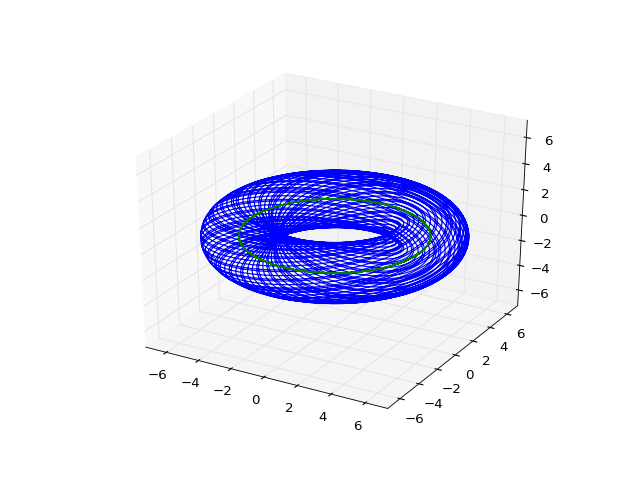

In [79]:
torus(w1=2, w2=2**0.5) #niewymierny stosunek częstości

<IPython.core.display.Javascript object>


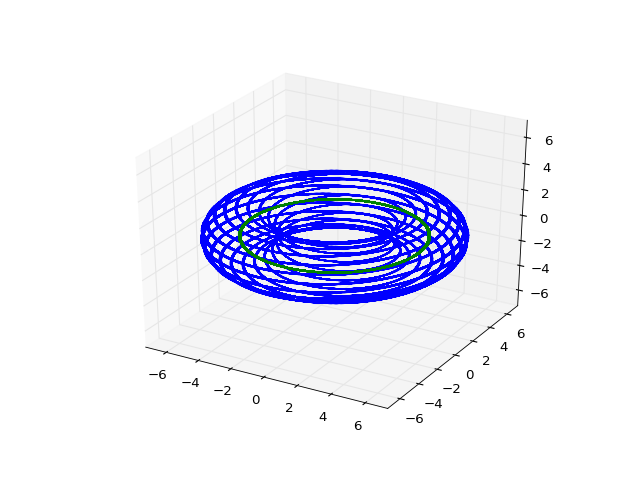

In [88]:
torus(w1 = 20, w2 = 3)

<IPython.core.display.Javascript object>


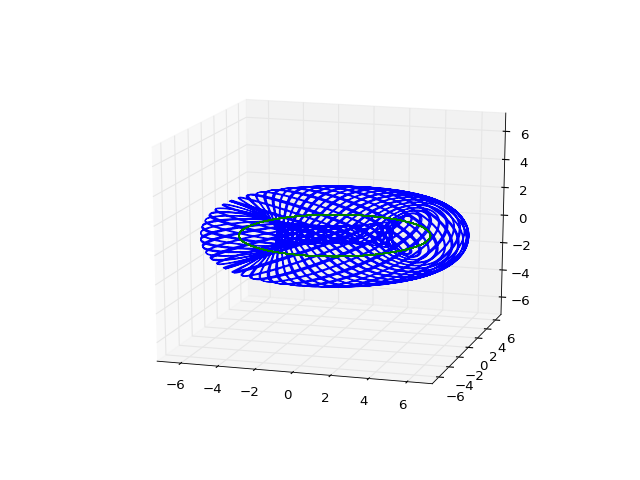

In [90]:
torus(w1 = np.sqrt(np.pi), w2=np.pi)

Ciąg bifurkacji Hopfa dodaje kolejne wymiary do tego torusa. 4-wymiarowego już chyba nie dam rady narysować. W każdym razie: bifurkacje Hopfa zdają się polegać na sprzęganiu kolejnych oscylatorów, kolejnych częstotliwości. A jak to pociągnąć w nieskończoność, to dostajemy turbulencję (wg Landau)!.

*** Dyskretne widmo mocy!***

### Ruelle, Takens, Newhouse

### Jensens

In [181]:
%matplotlib inline
gamma = 1.576
A = 1
B = 1.4
t, dt = np.linspace(0, 200, 25000, retstep=True)
NT = 450
omega = 2*np.pi/(NT*dt)
def jensen_plot(gamma = gamma, A = A, B = B, NT = NT):
    print(omega)
    def jensen(r, t, gamma=gamma, A=A, omega=omega, B=B):
        theta, v = r
        return np.array([v, -gamma*v-np.sin(theta)+A*np.cos(omega*t)+B])

    r = odeint(jensen, np.random.random(2), t) %1
    r = r[1000:]
    tp = t[1000:]
    theta, v = r.T
    fig1, ax1 = plt.subplots()
    ax1.plot(tp, theta)

    fig2, ax2 = plt.subplots()
    theta_przekroj = theta[::NT]
    ax2.plot(theta_przekroj[:-1], theta_przekroj[1:], "bo")   

1.7452594388242495


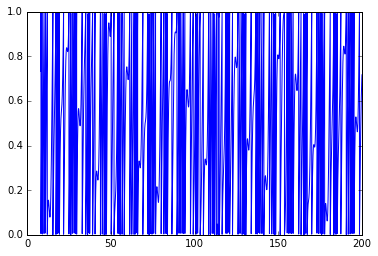

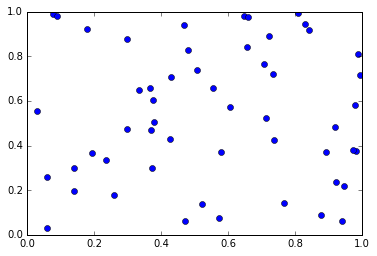

In [182]:
jensen_plot()

1.7452594388242495


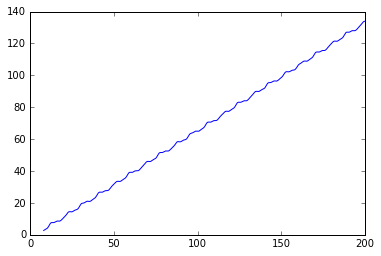

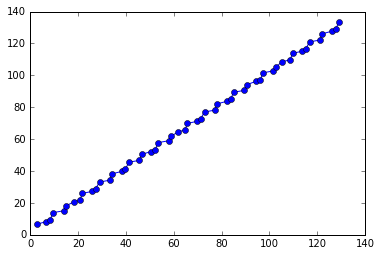

In [178]:
jensen_plot(gamma = 1.253, B = 1.2)

1.7452594388242495


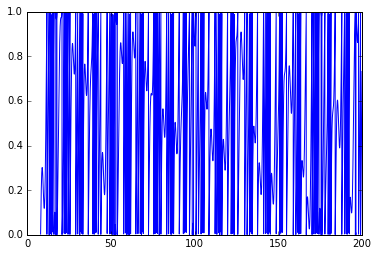

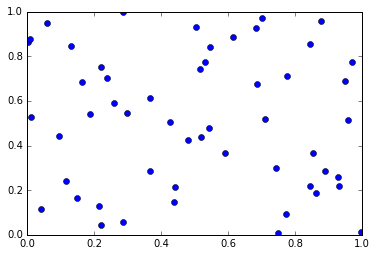

In [183]:
jensen_plot(gamma = 1.081, B = 1.094)